<a href="https://colab.research.google.com/github/haujla2391/CSCI-4170/blob/main/CSCI4170_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI 4170 Hw 1

## TASK 1

### 1. Objective function using MLE

$P(y_i = 1 | x_i, w ) = \sigma(w^Tx_i)$ and $\sigma(z) = \frac{1}{ 1 + e^{-z}}$ \
And so $P(y_i = 0 | x_i, w ) = 1 - \sigma(w^Tx_i)$

We can write the probability of observing a single data point $(x_i, y_i)$ as:
$P(y_i | x_i, w) = \sigma(w^Tx_i)^{y_i} (1 - \sigma(w^Tx_i))^{1 - y_i}$

So we have two cases:
- If $y_i = 1$, then $P(y_i | x_i, w) = \sigma(w^Tx_i)^1 (1 - \sigma(w^Tx_i))^0 = \sigma(w^Tx_i)$.
- If $y_i = 0$, then $P(y_i | x_i, w) = \sigma(w^Tx_i)^0 (1 - \sigma(w^Tx_i))^1 = 1 - \sigma(w^Tx_i)$.

#### Likelihood Function
$L(w) = \prod_{i=1}^{N} P(y_i | x_i, w) = \prod_{i=1}^{N} \sigma(w^Tx_i)^{y_i} (1 - \sigma(w^Tx_i))^{1 - y_i}$

#### Log Likelihood Function
$\log L(w) = \log \left( \prod_{i=1}^{N} \sigma(w^Tx_i)^{y_i} (1 - \sigma(w^Tx_i))^{1 - y_i} \right)$

We know: $\log(ab) = \log a + \log b$ and $\log(a^b) = b \log a$:

$\log L(w) = \sum_{i=1}^{N} \log \left( \sigma(w^Tx_i)^{y_i} (1 - \sigma(w^Tx_i))^{1 - y_i} \right)$

$\log L(w) = \sum_{i=1}^{N} \left[ y_i \log(\sigma(w^Tx_i)) + (1 - y_i) \log(1 - \sigma(w^Tx_i)) \right]$

#### Objective Function
$J(w) = \sum_{i=1}^{N} \left[ y_i \log(\sigma(w^Tx_i)) + (1 - y_i) \log(1 - \sigma(w^Tx_i)) \right]$

This is also the binary cross entropy which is when we negate the log likelihood to minimize the function.

Citations:
https://agustinus.kristia.de/blog/mle-vs-map/

### 2. Define machine learning problem

We can define the problem to be the probability of snowing in a specific location on a given day based on features such as temperature, humidity, atmospheric pressure, wind speed, and historical weather patterns. The binary classifiers are 1 if snowing and 0 if not. The output will be a probability between 0 and 1 of the chance of snow which is what forecasting applications have as well. The features are simple and clearly relate to the chance of snow the next day and this model can show the correlations between these features (such as a lower temperature leading to a higher probability)

Another model is the Perceptron, which finds an optimal hyperplane to classify the data into two classes. It learns the weights with the update rule being many updates based on a missclassified points. The output here is either -1 or 1 which is a much stricter classifier than logistic regression.

Logistic Regression is preferred because for example, a 60% chance of snow allows for more nuanced decision-making than a simple it will snow or not prediction. The probability allows for risk assessment.

### 3. Dataset correspondence

Each row in this dataset would represent a single day's observation for a specific location.

*   **$x_i$ Features:**
    *   Temperature (e.g., in Celsius or Fahrenheit)
    *   Humidity (e.g., relative humidity percentage)
    *   Atmospheric Pressure (e.g., in hectopascals)
    *   Wind Speed (e.g., in km/h or mph)
    *   Presence of clouds (e.g., binary: 1 for cloudy, 0 for clear)
    *   Historical precipitation (e.g., amount of rain in the last 24 hours)
    *   Month or Season (encoded numerically or using one-hot encoding)
    *   Elevation of the location

*   **$y_i$ Target:**
    *   $y_i = 1$ if it snowed on day $i$.
    *   $y_i = 0$ if it did not snow on day $i$.

*   **$w$ (Weights / Coefficients):**
    
    Each component of $w$ corresponds to a feature in $x_i$.
    The model learns these weights by minimizing the negative log-likelihood over the training dataset.

Some assumptions in the derivation are:
* A binary outcome (snow and no snow)
* Data points are IID

## TASK 2

### 1.
Dataset: https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility

### 2. Exploratory Data Analysis



In [71]:
import pandas as pd

df = pd.read_csv("heart.csv")

# Basic info
print(df.shape)
print(df.info())
print(df.describe())


(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997 

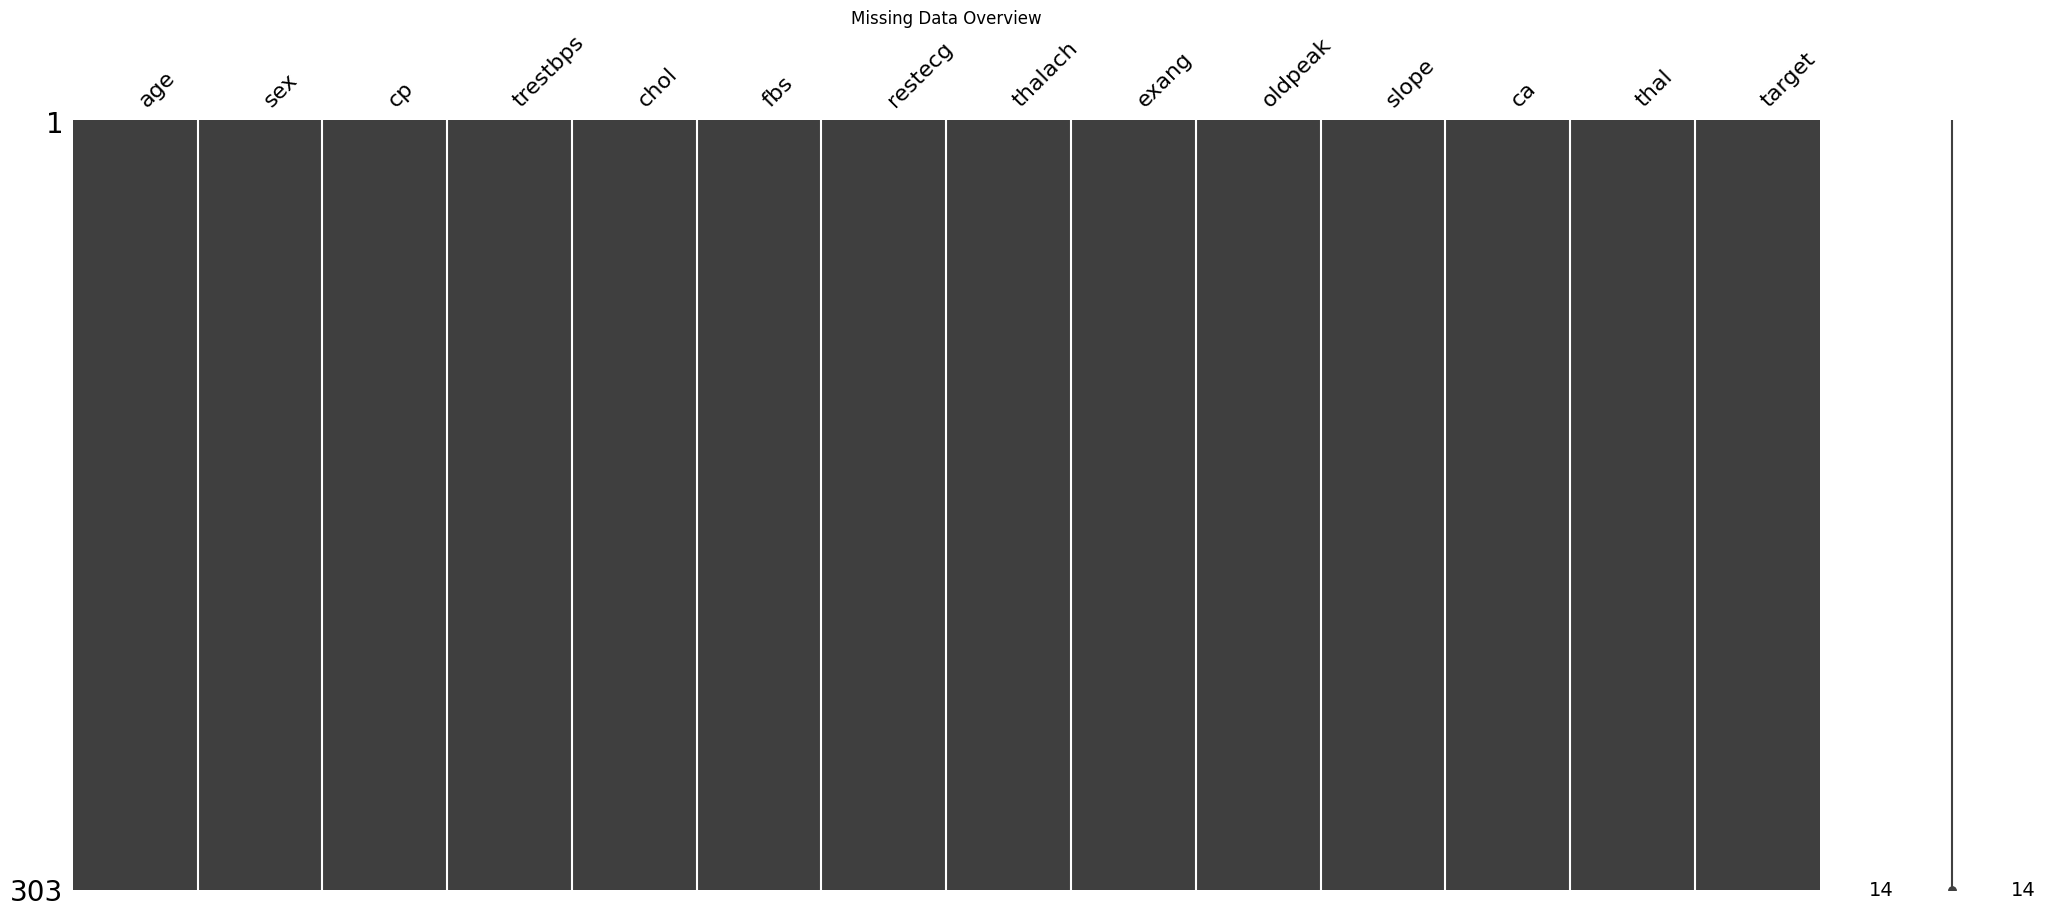

In [72]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.title("Missing Data Overview")
plt.show()


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Selecting numeric features
num_df = df.select_dtypes(include=["int64", "float64"])

# Add constant for VIF computation
X = num_df.copy()
X["Intercept"] = 1

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif_data.sort_values(by="VIF", ascending=False)


Feature         VIF
14  Intercept  212.998773
13     target    2.072754
9     oldpeak    1.744666
10      slope    1.662325
7     thalach    1.653567
0         age    1.443937
8       exang    1.440147
2          cp    1.397152
11         ca    1.290729
1         sex    1.231356
12       thal    1.191528
3    trestbps    1.180747
4        chol    1.152971
5         fbs    1.087698
6     restecg    1.066721

There is not really any multicolineararity here as the features all have a VIF score less than 5.

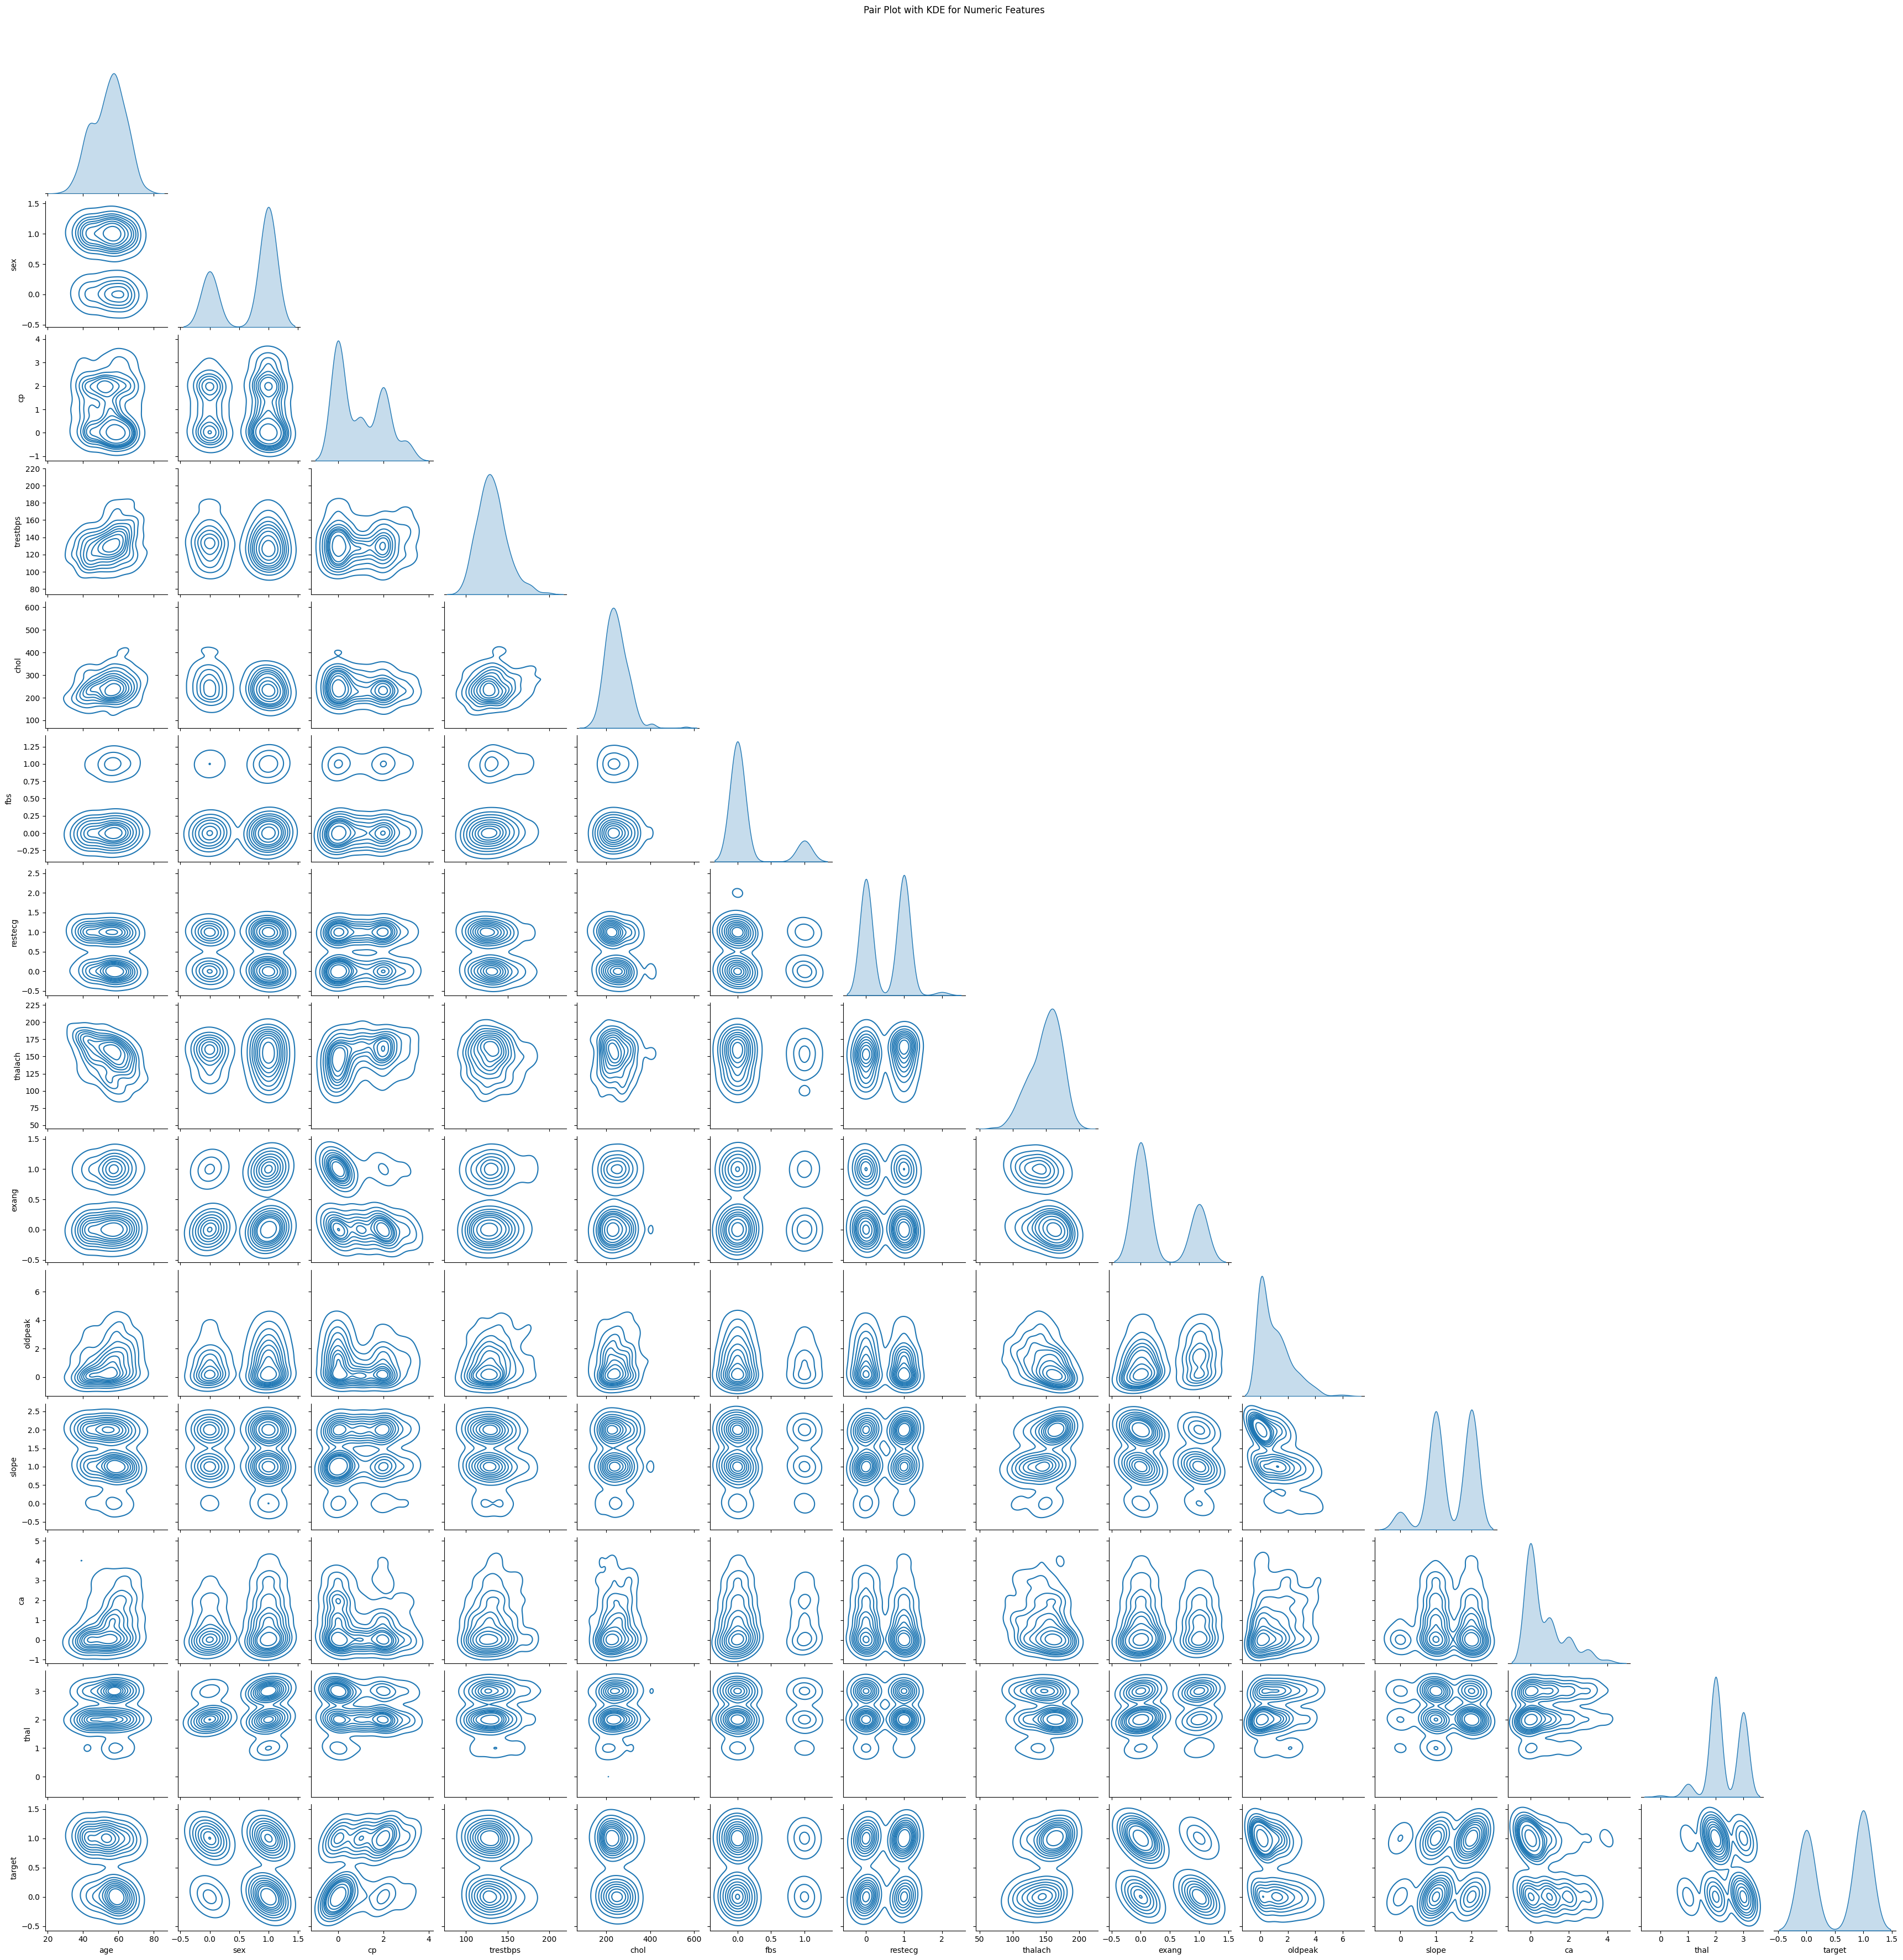

In [74]:
# KDE Pair Plot
import seaborn as sns

sns.pairplot(df[num_df.columns], kind="kde", diag_kind="kde", corner=True)
plt.suptitle("Pair Plot with KDE for Numeric Features", y=1.02)
plt.show()

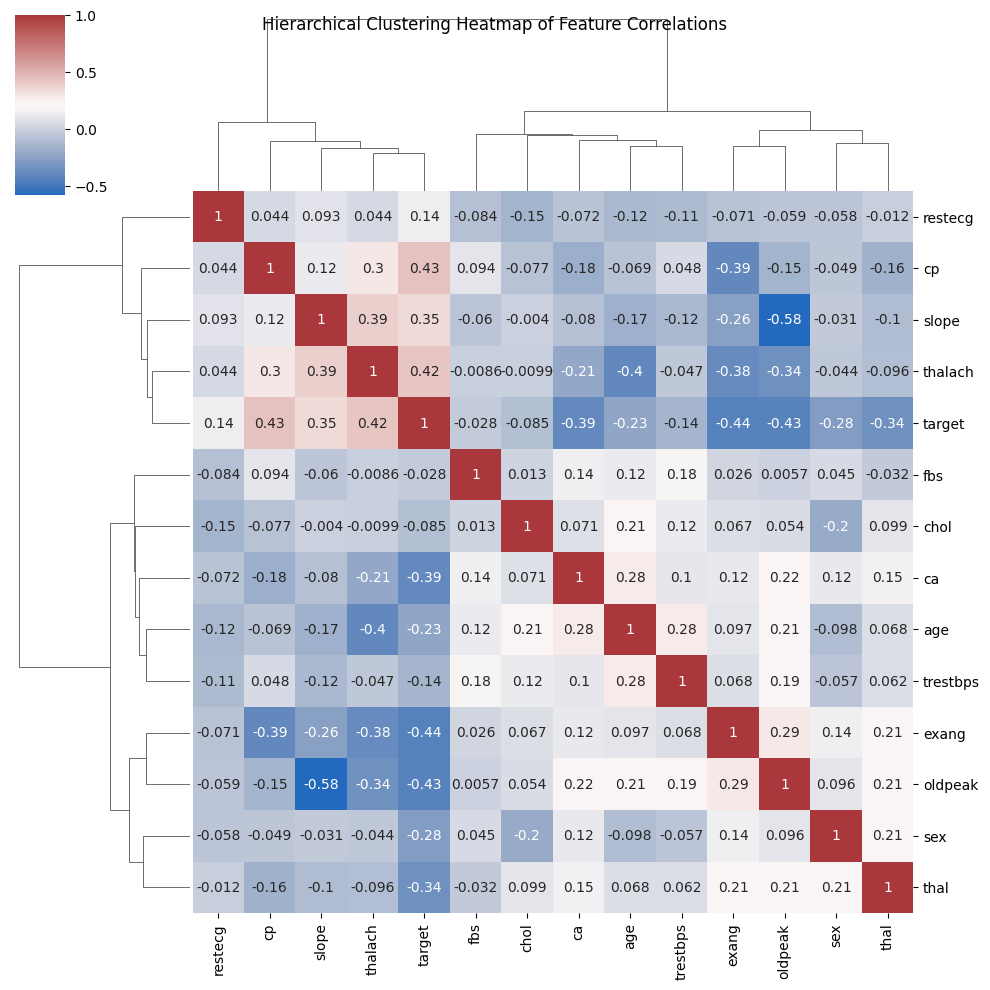

In [75]:
# Heatmap
import scipy.cluster.hierarchy as sch

# Compute correlation
corr = num_df.corr()

# Dendrogram
dendro = sch.linkage(corr, method="ward")
sns.clustermap(corr, row_linkage=dendro, col_linkage=dendro, cmap="vlag", annot=True)
plt.suptitle("Hierarchical Clustering Heatmap of Feature Correlations")
plt.show()


## TASK 3

### 1.

In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, w, b):
    n = X.shape[0]
    z = X @ w + b
    a = sigmoid(z)
    eps = 1e-12
    loss = -(y*np.log(a + eps) + (1 - y)*np.log(1 - a + eps)).mean()
    return loss

def compute_gradients(X, y, w, b):
    n = X.shape[0]
    z = X @ w + b
    a = sigmoid(z)
    dz = a - y
    dw = (X.T @ dz) / n
    db = dz.mean()
    return dw, db



### 2.

In [77]:
def batch_gradient_descent(X, y, lr=0.1, steps=300):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    losses = []

    for t in range(steps):
        dw, db = compute_gradients(X, y, w, b)
        w -= lr * dw
        b -= lr * db

        loss = compute_loss(X, y, w, b)
        losses.append(loss)

        if t % 50 == 0:
            print(f"BGD step {t:3d} | loss {loss:.4f}")

    return w, b, losses


In [78]:
def stochastic_gradient_descent(X, y, lr=0.01, epochs=10):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    losses = []

    for epoch in range(epochs):
        indices = np.random.permutation(n)
        for i in indices:
            xi = X[i:i+1]
            yi = y[i:i+1]

            dw, db = compute_gradients(xi, yi, w, b)
            w -= lr * dw
            b -= lr * db

        loss = compute_loss(X, y, w, b)
        losses.append(loss)
        print(f"SGD epoch {epoch:2d} | loss {loss:.4f}")

    return w, b, losses


In [79]:
def mini_batch_gradient_descent(X, y, lr=0.05, batch_size=32, epochs=20):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    losses = []

    for epoch in range(epochs):
        indices = np.random.permutation(n)
        for start in range(0, n, batch_size):
            batch_idx = indices[start:start+batch_size]
            Xb = X[batch_idx]
            yb = y[batch_idx]

            dw, db = compute_gradients(Xb, yb, w, b)
            w -= lr * dw
            b -= lr * db

        loss = compute_loss(X, y, w, b)
        losses.append(loss)
        print(f"MBGD epoch {epoch:2d} | loss {loss:.4f}")

    return w, b, losses


#### Comparing all three methods on dataset

In [80]:
target_col = "target"

num_df = df.select_dtypes(include=["int64", "float64"])

X = num_df.drop(columns=[target_col]).values
y = num_df[target_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def accuracy(X, y, w, b):
  preds = sigmoid(X @ w + b) >= 0.5
  return (preds == y).mean()

w_bgd, b_bgd, loss_bgd = batch_gradient_descent(X_train, y_train)
w_sgd, b_sgd, loss_sgd = stochastic_gradient_descent(X_train, y_train)
w_mbgd, b_mbgd, loss_mbgd = mini_batch_gradient_descent(X_train, y_train)

print("\nTest Accuracy")
print("Batch GD:", accuracy(X_test, y_test, w_bgd, b_bgd))
print("SGD:", accuracy(X_test, y_test, w_sgd, b_sgd))
print("Mini-Batch GD:", accuracy(X_test, y_test, w_mbgd, b_mbgd))

BGD step   0 | loss 0.6595
BGD step  50 | loss 0.3721
BGD step 100 | loss 0.3516
BGD step 150 | loss 0.3455
BGD step 200 | loss 0.3428
BGD step 250 | loss 0.3415
SGD epoch  0 | loss 0.4129
SGD epoch  1 | loss 0.3736
SGD epoch  2 | loss 0.3598
SGD epoch  3 | loss 0.3523
SGD epoch  4 | loss 0.3483
SGD epoch  5 | loss 0.3459
SGD epoch  6 | loss 0.3441
SGD epoch  7 | loss 0.3430
SGD epoch  8 | loss 0.3423
SGD epoch  9 | loss 0.3417
MBGD epoch  0 | loss 0.5845
MBGD epoch  1 | loss 0.5192
MBGD epoch  2 | loss 0.4778
MBGD epoch  3 | loss 0.4507
MBGD epoch  4 | loss 0.4312
MBGD epoch  5 | loss 0.4161
MBGD epoch  6 | loss 0.4050
MBGD epoch  7 | loss 0.3965
MBGD epoch  8 | loss 0.3898
MBGD epoch  9 | loss 0.3839
MBGD epoch 10 | loss 0.3792
MBGD epoch 11 | loss 0.3752
MBGD epoch 12 | loss 0.3717
MBGD epoch 13 | loss 0.3689
MBGD epoch 14 | loss 0.3662
MBGD epoch 15 | loss 0.3639
MBGD epoch 16 | loss 0.3620
MBGD epoch 17 | loss 0.3603
MBGD epoch 18 | loss 0.3587
MBGD epoch 19 | loss 0.3572

Test Ac

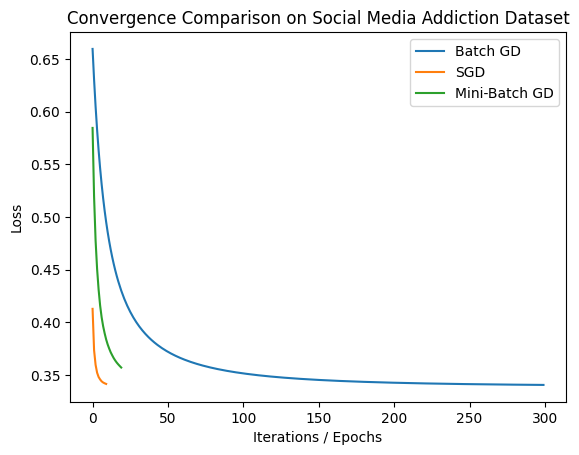

In [81]:
import matplotlib.pyplot as plt

plt.plot(loss_bgd, label="Batch GD")
plt.plot(loss_sgd, label="SGD")
plt.plot(loss_mbgd, label="Mini-Batch GD")
plt.xlabel("Iterations / Epochs")
plt.ylabel("Loss")
plt.title("Convergence Comparison on Social Media Addiction Dataset")
plt.legend()
plt.show()


Because the logistic regression cost function is convex, all three optimization methods converge toward the same global minimum. The primary difference lies in how accurately each method estimates the gradient of the cost function, which directly affects convergence speed and stability rather than the final solution.

## TASK 4

### 1 and 2.

In [82]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class ScratchSGDClassifier:
    def __init__(self, lr=0.01, epochs=10):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        self.w, self.b, self.losses = stochastic_gradient_descent(X, y, lr=self.lr, epochs=self.epochs)
        return self

    def predict_proba(self, X):
        if self.w is None or self.b is None:
            raise RuntimeError("Model not fitted yet.")
        if X.ndim == 1:
            X = X.reshape(1, -1)
        return sigmoid(X @ self.w + self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

def evaluate_model(name, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, zero_division=0),
        "Recall": recall_score(y_test, preds, zero_division=0),
        "F1": f1_score(y_test, preds, zero_division=0)
    }

sgd = ScratchSGDClassifier(lr=0.01, epochs=10)

momentum_sgd = MLPClassifier(
    hidden_layer_sizes=(),
    activation="logistic",
    solver="sgd",
    momentum=0.9,
    learning_rate_init=0.01,
    max_iter=2000,
    random_state=42,
    tol=1e-3,
    n_iter_no_change=10
)

adam = MLPClassifier(
    hidden_layer_sizes=(),
    activation="logistic",
    solver="adam",
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=42,
    tol=1e-3,
    n_iter_no_change=10
)

lbfgs = MLPClassifier(
    hidden_layer_sizes=(),
    activation="logistic",
    solver="lbfgs",
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=42,
    tol=1e-3,
    n_iter_no_change=10
)



In [83]:
results = []
results.append(evaluate_model("Vanilla SGD", sgd))
results.append(evaluate_model("Momentum SGD", momentum_sgd))
results.append(evaluate_model("lbfgs", lbfgs))
results.append(evaluate_model("Adam", adam))

results_df = pd.DataFrame(results)
results_df

SGD epoch  0 | loss 0.4142
SGD epoch  1 | loss 0.3731
SGD epoch  2 | loss 0.3590
SGD epoch  3 | loss 0.3522
SGD epoch  4 | loss 0.3484
SGD epoch  5 | loss 0.3458
SGD epoch  6 | loss 0.3441
SGD epoch  7 | loss 0.3431
SGD epoch  8 | loss 0.3423
SGD epoch  9 | loss 0.3416


Model  Accuracy  Precision    Recall        F1
0   Vanilla SGD  0.803279   0.769231  0.909091  0.833333
1  Momentum SGD  0.786885   0.750000  0.909091  0.821918
2         lbfgs  0.803279   0.769231  0.909091  0.833333
3          Adam  0.672131   0.696970  0.696970  0.696970

The lbfgs performs best compared to the other algorthms suggesting that the hyperparameters need some tuning for other models.

### 3.

For the scratch SGD, I tuned the parameters to a 0.001 lr and 200 epochs. The other three models, I used GridSearchCV to tune the parameters.

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_momentum = {
    "learning_rate_init": [0.001, 0.01, 0.05],
    "momentum": [0.5, 0.9, 0.95],
    "alpha": [0.0001, 0.001, 0.01]
}

grid_momentum = GridSearchCV(
    momentum_sgd,
    param_grid_momentum,
    scoring="f1",
    cv=3,
    n_jobs=-1
)
grid_momentum.fit(X_train, y_train)
print("Momentum best:", grid_momentum.best_params_)

param_grid_adam = {
    "learning_rate_init": [0.0001, 0.001, 0.01],
    "alpha": [0.0001, 0.001, 0.01]
}

grid_adam = GridSearchCV(
    adam,
    param_grid_adam,
    scoring="f1",
    cv=3,
    n_jobs=-1
)
grid_adam.fit(X_train, y_train)
print("Adam best:", grid_adam.best_params_)

lbfgs_model = LogisticRegression(solver="lbfgs", max_iter=2000)

param_grid_lbfgs = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"]
}

grid_lbfgs = GridSearchCV(
    lbfgs_model,
    param_grid_lbfgs,
    scoring="f1",
    cv=3,
    n_jobs=-1
)

grid_lbfgs.fit(X_train, y_train)
print("LBFGS best:", grid_lbfgs.best_params_)


Momentum best: {'alpha': 0.0001, 'learning_rate_init': 0.05, 'momentum': 0.95}
Adam best: {'alpha': 0.0001, 'learning_rate_init': 0.01}
LBFGS best: {'C': 0.01, 'penalty': 'l2'}


In [85]:
results = []

scratch = ScratchSGDClassifier(lr=0.001, epochs=200)
scratch.fit(X_train, y_train)
results.append(("Scratch SGD", scratch))

# Momentum
results.append(("Momentum SGD", grid_momentum.best_estimator_))

# Adam
results.append(("Adam", grid_adam.best_estimator_))

# LBFGS
results.append(("LBFGS", grid_lbfgs.best_estimator_))

final_results = []
for name, model in results:
    preds = model.predict(X_test)
    final_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, zero_division=0),
        "Recall": recall_score(y_test, preds, zero_division=0),
        "F1": f1_score(y_test, preds, zero_division=0)
    })

pd.DataFrame(final_results)


SGD epoch  0 | loss 0.6213
SGD epoch  1 | loss 0.5692
SGD epoch  2 | loss 0.5306
SGD epoch  3 | loss 0.5014
SGD epoch  4 | loss 0.4789
SGD epoch  5 | loss 0.4611
SGD epoch  6 | loss 0.4467
SGD epoch  7 | loss 0.4349
SGD epoch  8 | loss 0.4250
SGD epoch  9 | loss 0.4168
SGD epoch 10 | loss 0.4097
SGD epoch 11 | loss 0.4036
SGD epoch 12 | loss 0.3984
SGD epoch 13 | loss 0.3938
SGD epoch 14 | loss 0.3897
SGD epoch 15 | loss 0.3861
SGD epoch 16 | loss 0.3829
SGD epoch 17 | loss 0.3800
SGD epoch 18 | loss 0.3774
SGD epoch 19 | loss 0.3750
SGD epoch 20 | loss 0.3729
SGD epoch 21 | loss 0.3709
SGD epoch 22 | loss 0.3691
SGD epoch 23 | loss 0.3675
SGD epoch 24 | loss 0.3660
SGD epoch 25 | loss 0.3646
SGD epoch 26 | loss 0.3633
SGD epoch 27 | loss 0.3621
SGD epoch 28 | loss 0.3610
SGD epoch 29 | loss 0.3600
SGD epoch 30 | loss 0.3591
SGD epoch 31 | loss 0.3582
SGD epoch 32 | loss 0.3573
SGD epoch 33 | loss 0.3565
SGD epoch 34 | loss 0.3558
SGD epoch 35 | loss 0.3551
SGD epoch 36 | loss 0.3545
S

Model  Accuracy  Precision    Recall        F1
0   Scratch SGD  0.803279   0.769231  0.909091  0.833333
1  Momentum SGD  0.803279   0.769231  0.909091  0.833333
2          Adam  0.786885   0.750000  0.909091  0.821918
3         LBFGS  0.819672   0.761905  0.969697  0.853333

All algorithms' performace improved and LBFGS is still the best performer.

### 4.

To conclude, vanilla SGD (implemented from scratch), momentum SGD, Adam, and LBFGS were all compared. Vanilla SGD is computationally efficient and highly interpretable, but it converges slowly and requires careful tuning, making it less suitable for large datasets. Momentum SGD improves convergence speed by smoothing oscillations, while remaining scalable and interpretable, making it a strong choice for large-scale problems. Adam further accelerates convergence by adapting learning rates per feature, but it requires more memory and computation due to moment estimates, though it remains effective for large and noisy datasets. LBFGS uses quasi-Newton optimization and typically converges in fewer iterations, but each iteration is computationally expensive and requires full-batch gradient computation, which makes it less suitable for very large datasets despite its strong performance on smaller to medium-sized datasets. Overall, momentum SGD and Adam offer the best balance of speed, stability, and scalability, while LBFGS is ideal for smaller datasets and scratch SGD provides a simple, interpretable baseline.